## Obtain filtered list of characters

#### Import stuff

In [20]:
import pickle
import classes
import filter_codes
import pandas as pd

#### Scrape characters

In [44]:
# Set up filter
char_filter = classes.CharFilter()
char_filter.winner = True
char_filter.difficulty = 'insane'
char_filter.campaign='majeyal'
char_filter.max_urls = 1000

versions = ['1.7.6', '1.7.5', '1.7.4', '1.7.3', '1.7.2', '1.7.1', '1.7.0']
classes_list = list(filter_codes.class_codes.keys())

# Loop over all classes
for class_ in classes_list:
    print(f"Now starting with {class_}...")
    characters = classes.CharacterList(list())
    
    char_filter.char_class = class_

    # Loop over versions, may want to include this in the CharFilter class in the future
    for version in versions:
        
        char_filter.version = version
        characters += char_filter.get_characters()


    # Save characters to pickle
    with open(f'pickles/{class_}.pkl', 'wb') as fp:
        pickle.dump(characters, fp)


#### Load saved characters

In [36]:
# open a file, where you stored the pickled data
file = open('pickles/Arcane Blade.pkl', 'rb')

# dump information to that file
characters = pickle.load(file)

# close the file
file.close()

#### Clean list of characters

In [37]:
characters.clean_characters()

Threw Condos the level 50 Bloodruned Arcane Blade by hstngsjj away, too many prodigies
Threw Dianshou the level 50 Shalore Arcane Blade by pseudoku away, too many prodigies
Threw Cow Level the level 50 Whitehoof Arcane Blade by Niradill away, too many prodigies
Threw Galsa the level 50 Doomelf Arcane Blade by Hayden2e away, too many prodigies
Threw Isiwen the level 50 Lich Arcane Blade by HSmage away, too many prodigies
Threw insaneblade the level 50 Cornac Arcane Blade by jeongeum away, too many prodigies
Threw Frustration the level 50 Whitehoof Arcane Blade by mannendake away, too many prodigies
Threw i'm sick of dying the level 50 Cornac Arcane Blade by mannapuuro away, too many prodigies
Threw Sylvia the level 50 Shalore Arcane Blade by Kimmie away, too many prodigies
Threw Eyron the level 50 Higher Arcane Blade by Jon the Red away, too many prodigies
Threw 7.2 AB I the level 50 Shalore Arcane Blade by freepaperclips away, too many prodigies
Threw Ana the level 50 Cornac Arcane Bla

## Analysis

#### Summary of list

In [38]:
characters.print_summary(num=5)

Races: 	Skeleton (21.1)%, Cornac (13.2)%, Higher (10.5)%, Halfling (10.5)%, Shalore (10.5)%, 
Prodigies: 	Flexible Combat (61.4)%, Ethereal Form (34.2)%, Cauterize (27.2)%, Adept (22.8)%, Arcane Amplification Drone (15.8)%, 
inscriptions: 	Rune: Shatter Afflictions (90.4)%, Rune: Reflection Shield (73.7)%, Rune: Stormshield (56.1)%, Rune: Dissipation (50.0)%, Infusion: Movement (50.0)%, 


#### Races

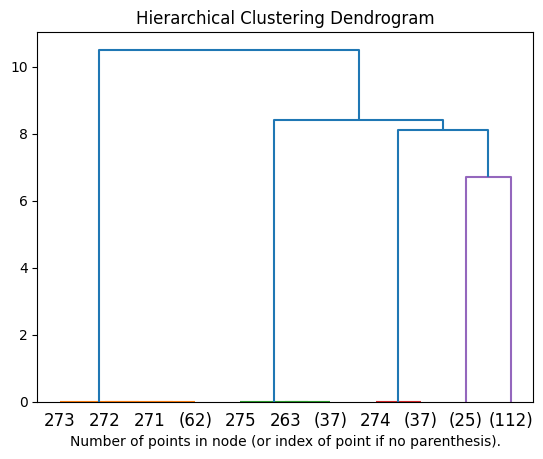

Index(['Kruk Ghoul', 'Thalore', 'Yeek', 'Prismatic Golem', 'Orc', 'Cornac',
       'Krog', 'Doomelf', 'Kruk Yeti', 'Drem', 'Cursed Gnome', 'Hulk',
       'Whitehoof', 'Ghoul', 'Ogre', 'Skeleton', 'Shalore', 'Dwarf', 'Higher',
       'Halfling'],
      dtype='object')

In [173]:
characters.print_dendrogram("race")
df = characters.get_encoded_feature_df("race")
df.columns



#### Prodigies

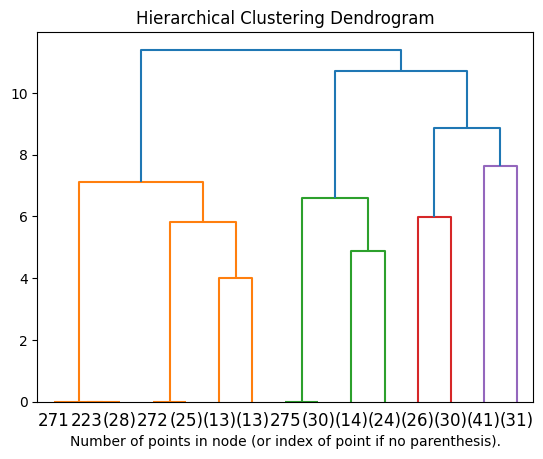

		 Prodigy 1 			 Prodigy 2
Cluster 1 	 Aether Permeation
Cluster 2 	 Ethereal Form
Cluster 3 	 #LIGHT_STEEL_BLUE#High Thaumaturgist (Class Evolution)
Cluster 4 	 Arcane Amplification Drone
Cluster 5 	 Adept 	 #LIGHT_STEEL_BLUE#Technomancer (Class Evolution)


Elemental Surge                                           0.048780
Ethereal Form                                             0.000000
Cauterize                                                 0.121951
Corrupted Shell                                           0.048780
Draconic Will                                             0.024390
#LIGHT_STEEL_BLUE#High Thaumaturgist (Class Evolution)    0.000000
Windtouched Speed                                         0.048780
Swift Hands                                               0.024390
Windblade                                                 0.024390
Arcane Amplification Drone                                0.000000
Unbreakable Will                                          0.000000
Adept                                                     0.682927
Aether Permeation                                         0.000000
#LIGHT_STEEL_BLUE#Technomancer (Class Evolution)          0.682927
Master of Disasters                                       0.09

In [22]:
characters.print_dendrogram("prodigies")
means, closest = characters.get_cluster_centers_and_closest_observations(features='prodigies', num_clusters=5)

def get_prodigies(series):
    
    prodigies = list()
    
    for prodigy, value in series.items():
        if value == 1:
            prodigies.append(prodigy)
            
    return prodigies

def print_closest_observations(closest_observations):
    
    print('\t\t Prodigy 1 \t\t\t Prodigy 2')
    
    for cluster, closest in enumerate(closest_observations):
        prodigies = get_prodigies(closest)

        prodigies_string = ''
        
        for prodigy in prodigies:
            prodigies_string += f' \t {prodigy}'
        
        print(f"Cluster {cluster+1}{prodigies_string}")
        
print_closest_observations(closest)

model = characters.get_cluster_model(features='prodigies', num_clusters=5)
model.labels_

means[4]


#### Inscriptions

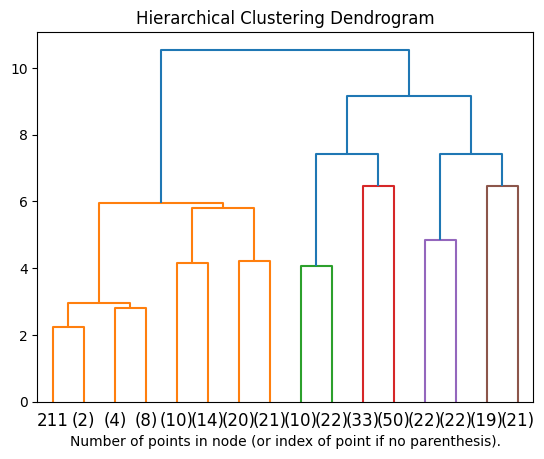

In [15]:
characters.print_dendrogram('inscriptions')

#### Talents

##### Class Talents

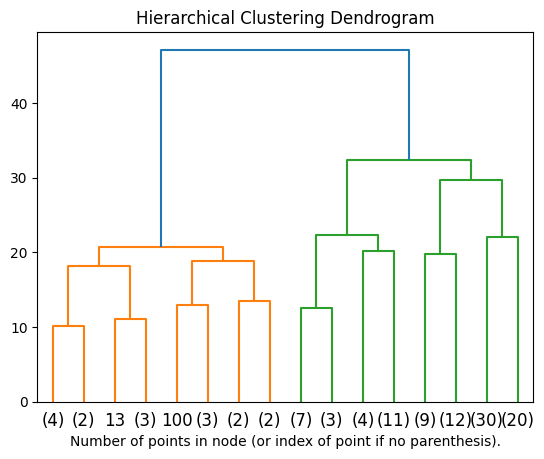

In [39]:
characters.print_dendrogram('class talents')

##### Generic Talents

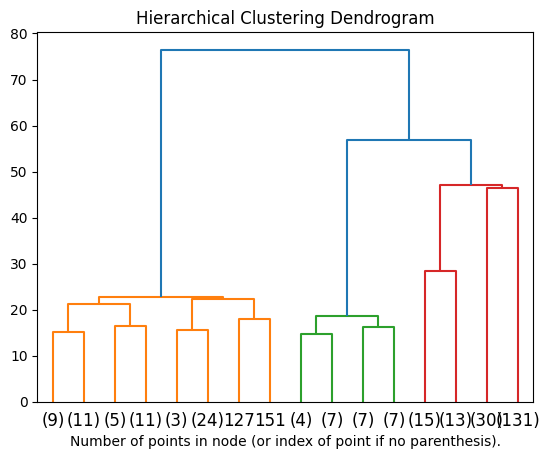

In [13]:
characters.print_dendrogram('generic talents')

#### Total

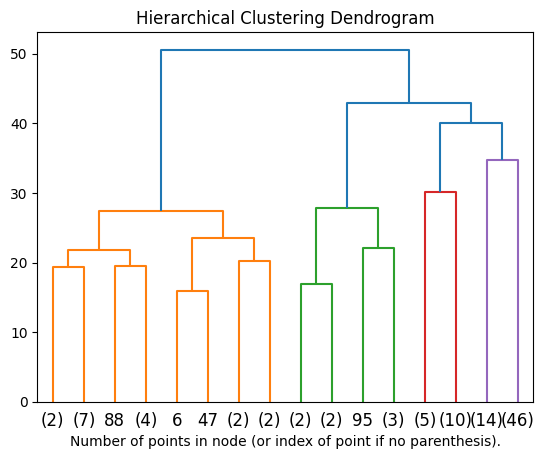

In [33]:
features = ['race', 'class talents', 'generic talents', 'prodigies']
weights = [1,1,1,5]
characters.print_dendrogram(features, weights)

# Export build to excel file with different working sheet for each cluster 

In [43]:
# features = ['race', 'class talents', 'generic talents', 'prodigies']
# weights = [1,1,1,5]
features = 'class talents'
weights = [1]
num_clusters = 2
means, closest = characters.get_cluster_centers_and_closest_observations(features=features, weights = weights, num_clusters=num_clusters)
        
import methods
    
#print_closest_observation(characters, closest[3])
mean_converted = methods.get_converted_mean(characters, means[0])
methods.print_closest_observation(characters, mean_converted)

# Make extra class for a series and add these functions there probably

Prodigies:
Class talents:
	Technique / Combat techniques
	 	 Rush                          : 	 3.0
	 	 Precise Strikes               : 	 2.0
	 	 Perfect Strike                : 	 4.0
	 	 Blinding Speed                : 	 4.0
	Spell / Air
	 	 Lightning                     : 	 5.0
	 	 Chain Lightning               : 	 4.0
	 	 Feather Wind                  : 	 5.0
	 	 Thunderstorm                  : 	 4.0
	Spell / Enhancement
	 	 Arcane Strike                 : 	 2.0
	 	 Fiery Hands                   : 	 2.0
	 	 Shock Hands                   : 	 4.0
	 	 Inner Power                   : 	 5.0
	Technique / Magical combat
	 	 Arcane Combat                 : 	 5.0
	 	 Arcane Cunning                : 	 4.0
	 	 Arcane Feed                   : 	 5.0
	 	 Arcane Destruction            : 	 4.0
	Technique / Two-handed assault
	 	 Stunning Blow                 : 	 1.0
	 	 Fearless Cleave               : 	 1.0
	 	 Death Dance                   : 	 1.0
	 	 Execution                     : 	 0.0
	Spell / 

In [42]:
characters.generic_talents_dict
     

{'Corruption / Vile life': ['Blood Splash',
  'Elemental Discord',
  'Healing Inversion',
  'Vile Transplant'],
 'Celestial / Chants': ['Chant Acolyte',
  'Chant Illuminate',
  'Chant Adept',
  'Chant Radiant'],
 'Race / Whitehooves': ['Whitehooves',
  'Dead Hide',
  'Lifeless Rush',
  'Essence Drain'],
 'Steamtech / Physics': ['Smith',
  'Mechanical',
  'Electricity',
  'Compact Steam Tank'],
 'Spell / Aegis': ['Arcane Reconstruction',
  'Shielding',
  'Arcane Shield',
  'Aegis'],
 'Steamtech / Chemistry': ['Therapeutics',
  'Chemistry',
  'Explosives',
  'Steam Power'],
 'Technique / Combat training': ['Thick Skin',
  'Heavy Armour Training',
  'Light Armour Training',
  'Combat Accuracy',
  'Weapons Mastery',
  'Dagger Mastery'],
 'Technique / Mobility': ['Disengage',
  'Evasion',
  'Tumble',
  'Trained Reactions'],
 'Spell / Conveyance': ['Phase Door',
  'Teleport',
  'Displacement Shield',
  'Probability Travel'],
 'Cunning / Scoundrel': ['Lacerating Strikes',
  "Scoundrel's Strat